# Image Morphology

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Convert to Binary

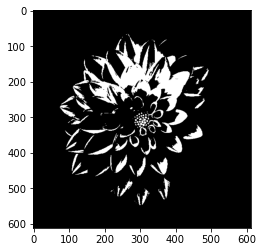

In [3]:
im_gray = cv2.imread('Flower3.jpg', cv2.IMREAD_GRAYSCALE)
(tresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
thresh = 127
im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]
thresh = 127
cv2.imwrite('bw_flower.jpg', im_bw)
plt.imshow(im_bw, cmap='gray')

## Erosion

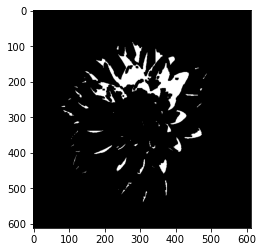

In [4]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(im_bw,kernel,iterations = 1)
plt.imshow(erosion, cmap="gray")

## Dilation

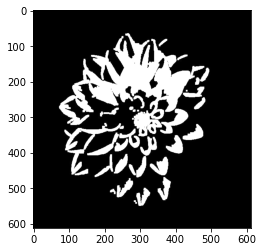

In [7]:
im_bw = cv2.imread("bw_flower.jpg")
dilation = cv2.dilate(im_bw, kernel, iterations = 1)
plt.imshow(dilation, cmap="gray")

## Opening

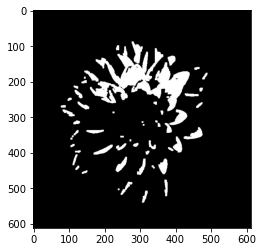

In [8]:
im_bw = cv2.imread("bw_flower.jpg")
opening = cv2.morphologyEx(im_bw, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

## Closing

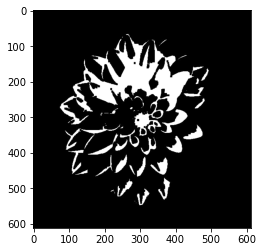

In [10]:
im_bw = cv2.imread("bw_flower.jpg")
closing = cv2.morphologyEx(im_bw, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')

## TopHat

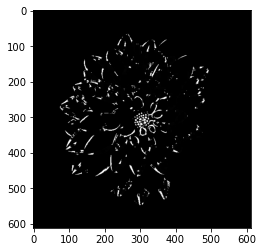

In [11]:
im_bw = cv2.imread("bw_flower.jpg")
tophat = cv2.morphologyEx(im_bw, cv2.MORPH_TOPHAT, kernel)
plt.imshow(tophat, cmap='gray')

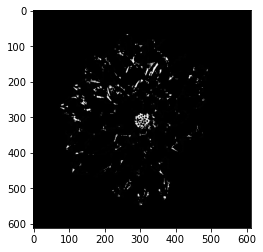

In [12]:
im_bw = cv2.imread("bw_flower.jpg")
blackhat = cv2.morphologyEx(im_bw, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat, cmap='gray')

## Scikit Morph

In [17]:
from skimage import morphology, filters
from skimage import data
import matplotlib.image as mpimg

In [18]:
im = mpimg.imread('bw_flower.jpg')
binary = im > filters.threshold_otsu(im)
np.unique(binary)

array([False,  True])

## Skeletonize

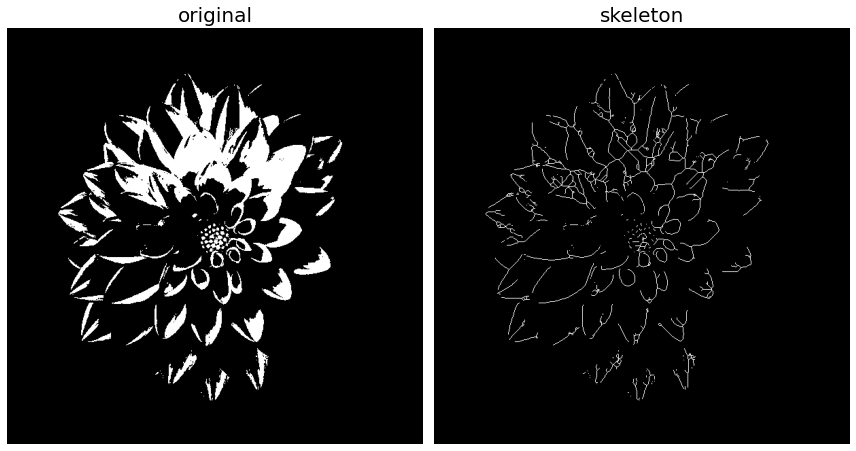

In [25]:
skeleton = morphology.skeletonize(binary)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,12), sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(im, cmap='gray')
ax[0].axis('off')
ax[0].set_title('original',fontsize=20)

ax[1].imshow(skeleton, cmap='gray')
ax[1].axis('off')
ax[1].set_title('skeleton',fontsize=20)

fig.tight_layout()
plt.show()

## Thining

In [24]:
thinned = morphology.thin(binary)
thinned_partial = morphology.thin(binary, max_iter=25)

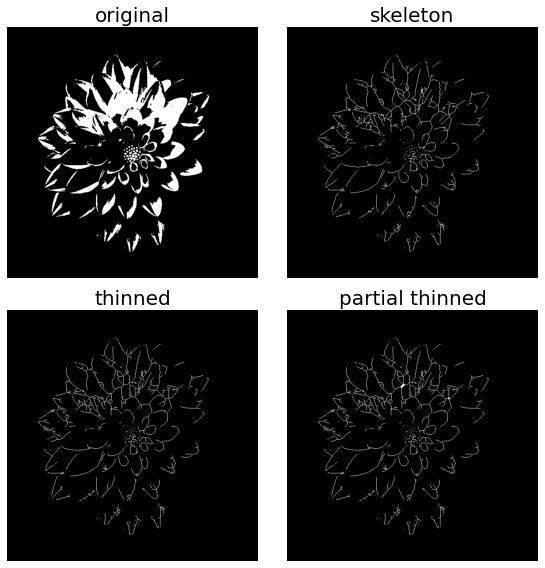

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(8,8), sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(binary, cmap='gray')
ax[0].axis('off')
ax[0].set_title('original',fontsize=20)

ax[1].imshow(skeleton, cmap='gray')
ax[1].axis('off')
ax[1].set_title('skeleton',fontsize=20)

ax[2].imshow(thinned, cmap='gray')
ax[2].axis('off')
ax[2].set_title('thinned',fontsize=20)

ax[3].imshow(thinned_partial, cmap='gray')
ax[3].axis('off')
ax[3].set_title('partial thinned',fontsize=20)

fig.tight_layout()
plt.show()

## Convex hull

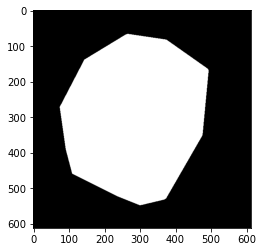

In [27]:
convexhull = morphology.convex_hull_image(binary)
plt.imshow(convexhull, cmap='gray')